In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Indians players

indians_data = master_data.loc[master_data["Franchise"] == "Indians"]

#Only showing players that signed with the Indians

signed_indians_data = indians_data.loc[indians_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_indians_data.groupby("Year")

#Unsigned Indians draft picks

unsigned_indians_data = indians_data.loc[indians_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1989    65.0
1991    38.4
2011    36.9
1998    33.8
1972    33.2
2006    29.6
1988    27.6
1987    25.7
1986    23.5
1969    22.4
2009    18.9
1979    17.3
2008    16.7
1993    16.5
1980    14.8
1994    13.1
2000    12.8
1992    11.6
2003    11.5
2010    11.3
2001    11.0
2016    10.8
2002    10.0
1995     9.7
1984     8.8
1965     8.8
1976     8.7
1981     8.5
1990     8.2
2012     8.2
1967     5.0
2004     4.6
1997     3.8
1975     3.8
1985     3.7
1999     2.3
1977     2.2
1974     2.1
1996     1.9
1978     1.9
2013     1.3
2014     1.2
1971     1.1
2007     0.8
1970     0.8
1982     0.3
1968     0.2
1966     0.2
1973     0.1
2017     0.1
2018     0.0
2019     0.0
2015    -0.1
2005    -0.4
1983    -0.7
Name: Total_WAR, dtype: float64

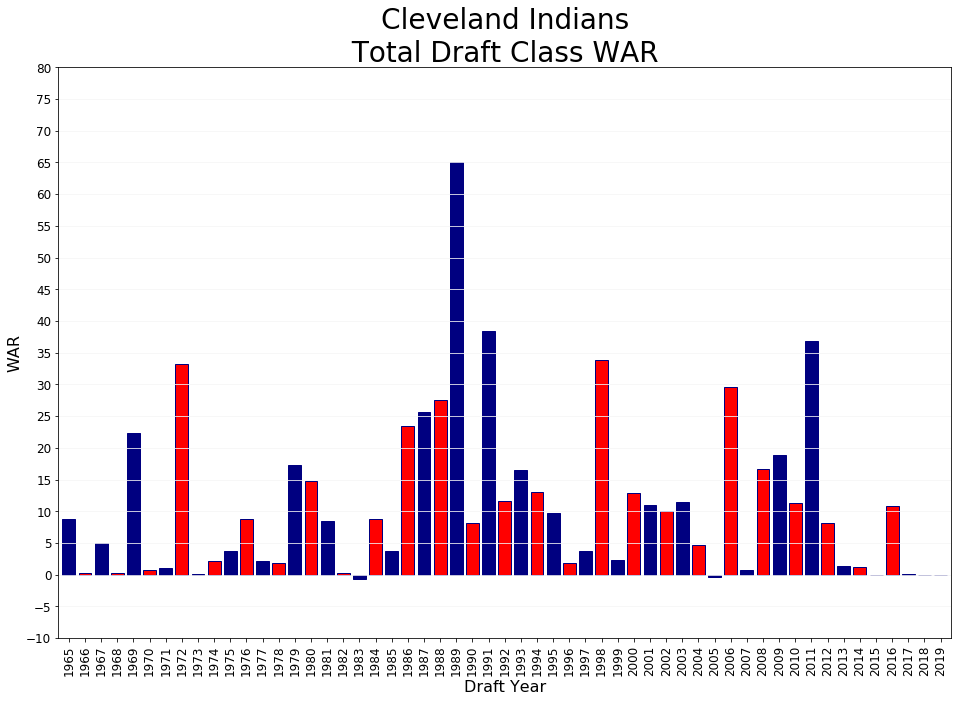

In [6]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["navy", "red"], width = .8, fontsize = 12, edgecolor = "navy", figsize = (16, 10.5))
plt.title("Cleveland Indians\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 81, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Indians WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_indians_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
35397,1998,1,20,Indians,Indians,Y,CC Sabathia,2001.0,sabatc.01,404.0,0.5,27.5,28.0,LHP,HS,Vallejo HS,Vallejo,CA,More than 25 WAR
54707,2011,1,8,Indians,Indians,Y,Francisco Lindor,2015.0,lindofr01,12916.0,27.2,0.0,27.2,SS,HS,Montverde HS,Montverde,FL,More than 25 WAR
6361,1972,3,50,Indians,Indians,Y,Dennis Eckersley,1975.0,eckerde01,1003660.0,0.0,26.5,26.5,RHP,HS,Washington Union HS,Fremont,CA,More than 25 WAR
21390,1989,17,437,Indians,Indians,Y,Brian Giles,1995.0,gilesbr02,990.0,26.2,0.0,26.2,OF,HS,Granite Hills HS,El Cajon,CA,More than 25 WAR
23943,1991,1,13,Indians,Indians,Y,Manny Ramirez,1993.0,ramirma02,210.0,25.8,0.0,25.8,3B,HS,George Washington HS,New York,NY,More than 25 WAR
17368,1986,1,2,Indians,Indians,Y,Greg Swindell,1986.0,swindgr01,76.0,-0.2,25.1,24.9,LHP,4Yr,University of Texas at Austin,Austin,TX,20-25 WAR
19537,1988,1,17,Indians,Indians,Y,Charles Nagy,1990.0,nagych01,397.0,0.0,22.9,22.9,RHP,4Yr,University of Connecticut,Storrs,CT,20-25 WAR
18304,1987,2,47,Indians,Indians,Y,Albert Belle,1989.0,belleal01,1000802.0,22.3,0.0,22.3,OF,4Yr,Louisiana State University,Baton Rouge,LA,20-25 WAR
3914,1969,16,375,Indians,Indians,Y,Buddy Bell,1972.0,bellbu01,1000799.0,21.3,0.0,21.3,2B,HS,Archbishop Moeller HS,Cincinnati,OH,20-25 WAR
21286,1989,13,333,Indians,Indians,Y,Jim Thome,1991.0,thomeji01,409.0,21.1,0.0,21.1,SS,JC,Illinois Central College,East Peoria,IL,20-25 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_indians_data.loc[((signed_indians_data["WAR Group"] == "Less than 5 WAR") |
(signed_indians_data["WAR Group"] == "No Major League Experience")) & 
(signed_indians_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
1665,1967,1,11,Indians,Indians,Y,Jack Heidemann,1969.0,heideja01,1005586.0,-4.3,0.0,-4.3,SS,HS,Brenham HS,Brenham,TX,Less than 5 WAR
2635,1968,1,6,Indians,Indians,Y,Michael Weaver,NaN,NaN,NaN,NaN,NaN,NaN,SS,HS,Paxon HS,Jacksonville,FL,No Major League Experience
3556,1969,1,15,Indians,Indians,Y,Alvin McGrew,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Parker HS,Birmingham,AL,No Major League Experience
4585,1970,1,2,Indians,Indians,Y,Steve Dunning,1970.0,dunnist01,1003572.0,0.9,0.5,1.4,RHP,4Yr,Stanford University,Palo Alto,CA,Less than 5 WAR
5519,1971,1,9,Indians,Indians,Y,David Sloan,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Santa Clara HS,Santa Clara,CA,No Major League Experience
7107,1973,1,5,Indians,Indians,Y,Glenn Tufts,NaN,NaN,NaN,NaN,NaN,NaN,INF,HS,Bridgewater-Raynham HS,Bridgewater,MA,No Major League Experience
7853,1974,1,4,Indians,Indians,Y,Tom Brennan,1981.0,brennto01,1001392.0,0.0,2.6,2.6,RHP,4Yr,Lewis University,Romeoville,IL,Less than 5 WAR
8543,1975,1,7,Indians,Indians,Y,Rick Cerone,1975.0,ceronri01,1002105.0,4.2,0.0,4.2,C,4Yr,Seton Hall University,South Orange,NJ,Less than 5 WAR
9229,1976,1,14,Indians,Indians,Y,Tim Glass,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Springfield South HS,Springfield,OH,No Major League Experience
9939,1977,1,11,Indians,Indians,Y,Bruce Compton,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Norman HS,Norman,OK,No Major League Experience


In [9]:
#Best unsigned draft picks in franchise history

unsigned_indians_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
46954,2005,42,1261,Indians,Indians,N,Tim Lincecum,2007.0,linceti01,5705.0,-0.5,27.9,27.4,RHP,4Yr,University of Washington,Seattle,WA,More than 25 WAR
12439,1980,4,87,Indians,Indians,N,Doug Drabek,1986.0,drabedo01,1003473.0,1.0,21.9,22.9,RHP,HS,St. Joseph's HS,Victoria,TX,20-25 WAR
17039,1985,20,505,Indians,Indians,N,Brian Jordan,1992.0,jordabr01,658.0,19.3,0.0,19.3,SS,HS,Milford Mill Academy,Baltimore,MD,15-20 WAR
7044,1972,36,733,Indians,Indians,N,Rick Langford,1976.0,langfri01,1007319.0,0.0,16.1,16.1,OF,JC,State College of Florida Manatee-Sarasota,Bradenton,FL,15-20 WAR
12751,1980,16,399,Indians,Indians,N,Terry Steinbach,1986.0,steinte01,1012473.0,13.1,0.0,13.1,3B,HS,New Ulm HS,New Ulm,MN,10-15 WAR
16339,1984,26,644,Indians,Indians,N,Mike Devereaux,1987.0,devermi01,1003242.0,12.8,0.0,12.8,OF,4Yr,Arizona State University,Tempe,AZ,10-15 WAR
46237,2005,18,544,Indians,Indians,N,Desmond Jennings,2010.0,jennide01,1965.0,11.7,0.0,11.7,OF,HS,Pinson Valley HS,Pinson,AL,10-15 WAR
2982,1968,16,354,Indians,Indians,N,Steve Stone,1971.0,stonest01,1012573.0,-1.4,11.2,9.8,RHP,4Yr,Kent State University,Kent,OH,5-10 WAR
52888,2009,41,1235,Indians,Indians,N,Max Muncy,2015.0,muncyma01,13301.0,9.4,0.0,9.4,C,HS,Keller HS,Keller,TX,5-10 WAR
3275,1968,29,647,Indians,Indians,N,Doug Bird,1973.0,birddo01,1000976.0,0.0,9.2,9.2,RHP,HS,Pomona HS,Pomona,CA,5-10 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_indians_data.loc[signed_indians_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
21390,1989,17,437,Indians,Indians,Y,Brian Giles,1995.0,gilesbr02,990.0,26.2,0.0,26.2,OF,HS,Granite Hills HS,El Cajon,CA,More than 25 WAR
3914,1969,16,375,Indians,Indians,Y,Buddy Bell,1972.0,bellbu01,1000799.0,21.3,0.0,21.3,2B,HS,Archbishop Moeller HS,Cincinnati,OH,20-25 WAR
21286,1989,13,333,Indians,Indians,Y,Jim Thome,1991.0,thomeji01,409.0,21.1,0.0,21.1,SS,JC,Illinois Central College,East Peoria,IL,20-25 WAR
27612,1993,24,671,Indians,Indians,Y,Richie Sexson,1997.0,sexsori01,709.0,12.2,0.0,12.2,1B,HS,Prairie HS,Brush Prairie,WA,10-15 WAR
9637,1976,18,422,Indians,Indians,Y,Ron Hassey,1978.0,hassero01,1005479.0,8.7,0.0,8.7,C,4Yr,University of Arizona,Tucson,AZ,5-10 WAR
51161,2008,33,1011,Indians,Indians,Y,Roberto Perez,2014.0,perezro02,2900.0,8.6,0.0,8.6,C,JC,Florida Gateway College,Lake City,FL,5-10 WAR
38722,2000,14,426,Indians,Indians,Y,Ryan Church,2004.0,churcry01,2106.0,8.3,0.0,8.3,OF,4Yr,University of Nevada Reno,Reno,NV,5-10 WAR
55397,2011,23,698,Indians,Indians,Y,Cody Allen,2012.0,allenco01,12183.0,0.0,7.5,7.5,RHP,4Yr,High Point University,High Point,NC,5-10 WAR
21598,1989,25,645,Indians,Indians,Y,Robert Person,1995.0,persoro01,966.0,-0.3,6.3,6.0,SS,JC,Seminole Community College,Sanford,FL,5-10 WAR
47775,2006,19,581,Indians,Indians,Y,Josh Tomlin,2010.0,tomlijo01,9388.0,0.3,5.5,5.8,RHP,4Yr,Texas Tech University,Lubbock,TX,5-10 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(indians_data["Year"], indians_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,14.7,79.4,5.9
1966,42.4,57.6,0.0
1967,26.2,60.7,13.1
1968,29.8,68.1,2.1
1969,28.6,66.7,4.8
1970,34.3,65.7,0.0
1971,22.2,70.4,7.4
1972,16.7,77.8,5.6
1973,31.0,57.1,11.9


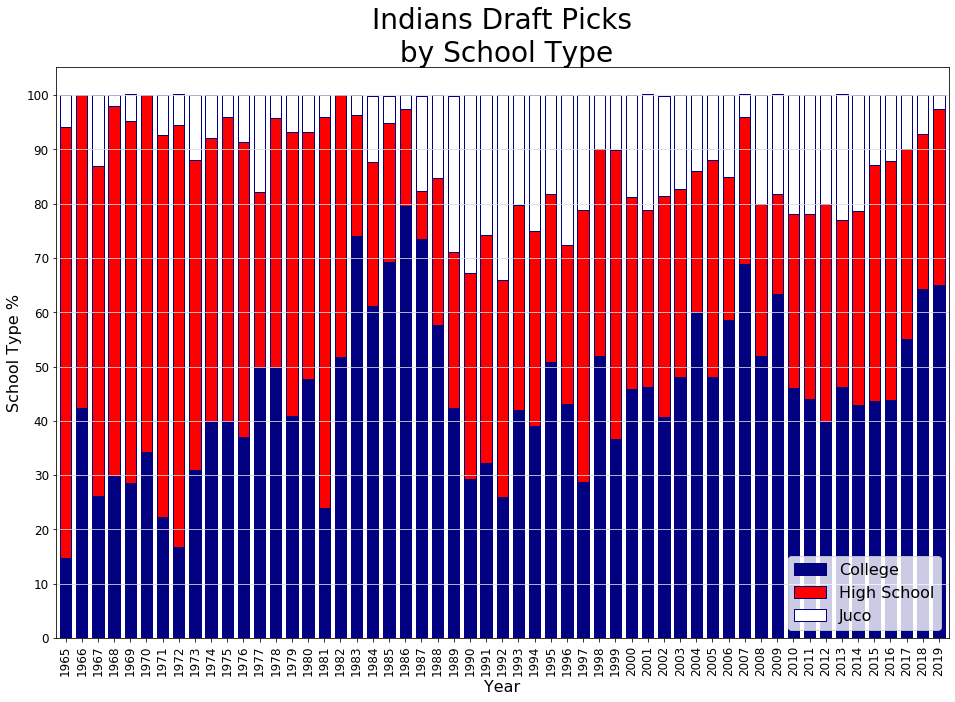

In [12]:
#Bar chart of table above

colors = ["navy", "red", "white"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "navy", stacked = True, figsize = (16, 10.5))
plt.title("Indians Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("Indians Draft Picks by School Type.png")
plt.show()